# Normalization
This noteook was developed to be run in Google Colab

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

from sklearn.model_selection import train_test_split

import os

In [ ]:
ROOT_PATH = '/content/drive/MyDrive/Colab Notebooks/TFM'

GESTURES = ['still', 'wave', 'swipe_left', 'swipe_down', 'swipe_right', 'swipe_up', 'stop', 'roll']

In [ ]:
gesture_frames = {
    'still':[],
    'wave':[],
    'swipe_left':[],
    'swipe_down':[],
    'swipe_right':[],
    'swipe_up':[],
    'stop':[],
    'roll':[]
}

for gesture in GESTURES:
    print(f'Reading samples for {gesture}')
    for file in glob.glob(ROOT_PATH + '/dataset/raw/' + gesture + '/*.csv'):
        print('*', end='')
        df = pd.read_csv(file)
        gesture_frames[gesture].append(df)
    df = pd.concat(gesture_frames[gesture], ignore_index=True)
    df.to_csv(ROOT_PATH + '/dataset/raw_concat/' + gesture + '.csv', index=False)
    print(' ')


Reading samples for still
**************************************************************************************************** 
Reading samples for wave
**************************************************************************************************** 
Reading samples for swipe_left
**************************************************************************************************** 
Reading samples for swipe_down
**************************************************************************************************** 
Reading samples for swipe_right
**************************************************************************************************** 
Reading samples for swipe_up
**************************************************************************************************** 
Reading samples for stop
**************************************************************************************************** 
Reading samples for roll
**************************************************************

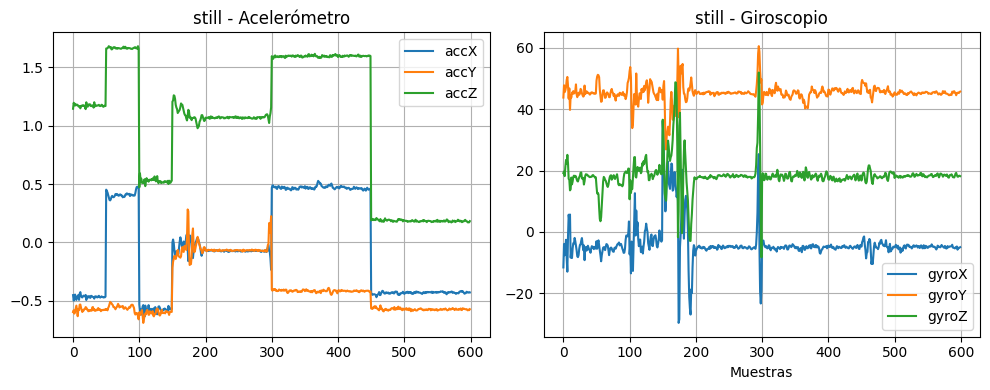

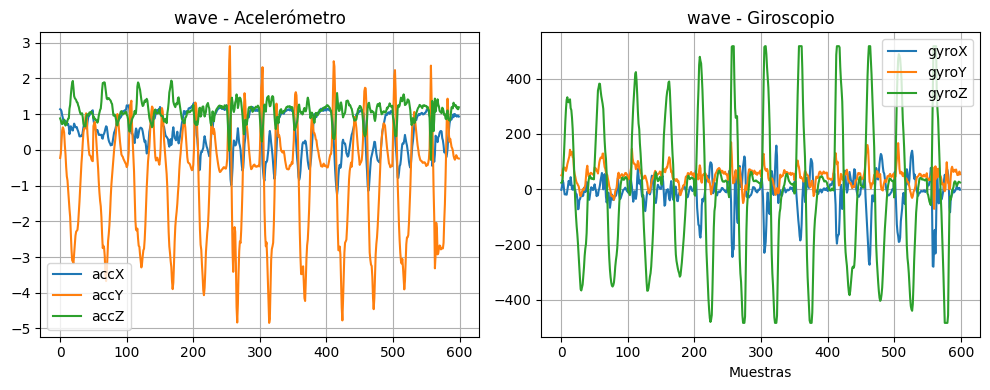

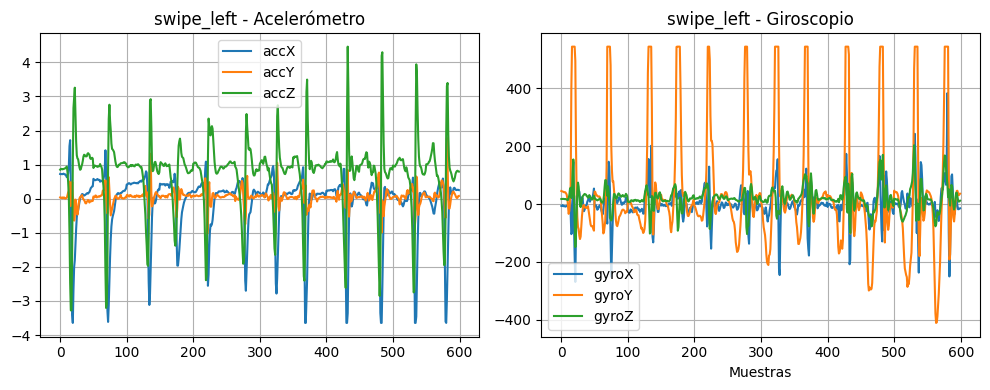

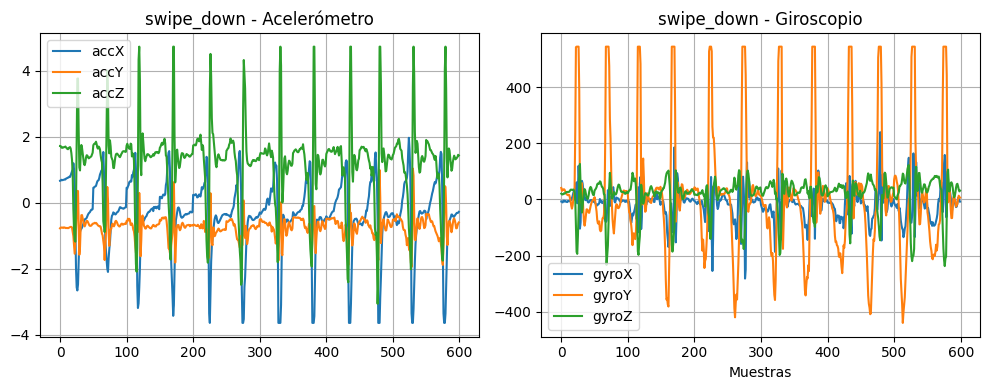

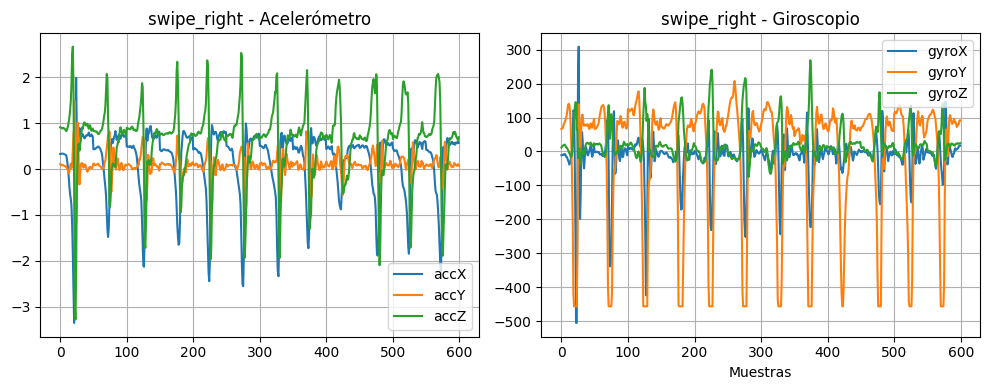

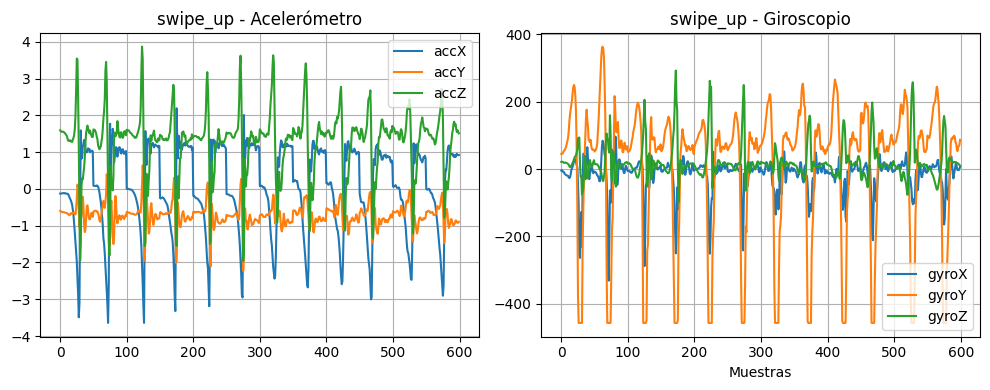

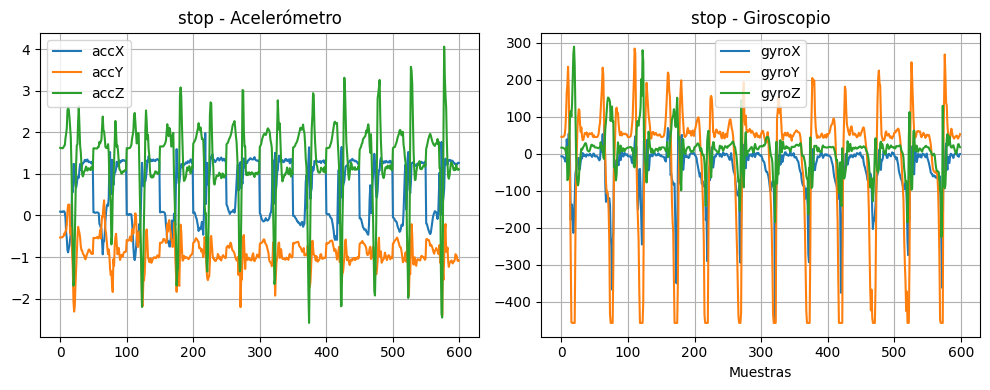

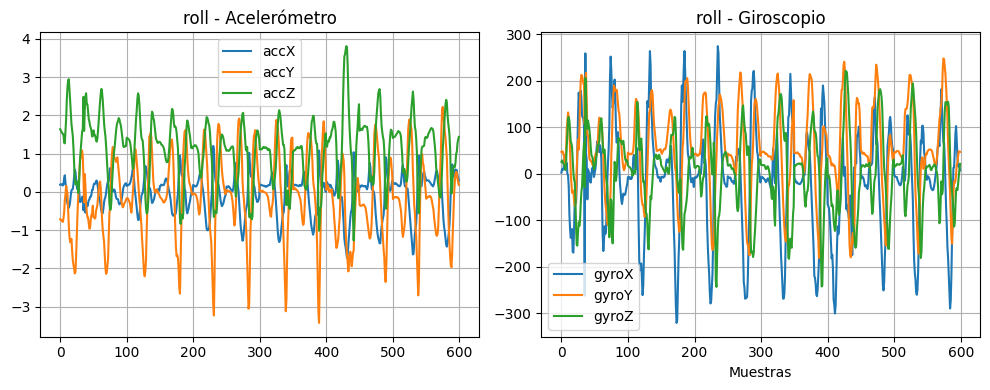

In [ ]:
for gesture in GESTURES:
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    df = pd.read_csv(f"{ROOT_PATH}/dataset/raw_concat/{gesture}.csv")

    axs[0].plot(df['accX'].head(600))
    axs[0].plot(df['accY'].head(600))
    axs[0].plot(df['accZ'].head(600))
    axs[0].set_title(f'{gesture} - Acelerómetro')
    axs[0].legend(['accX', 'accY', 'accZ'])
    axs[0].grid(True)

    axs[1].plot(df['gyroX'].head(600))
    axs[1].plot(df['gyroY'].head(600))
    axs[1].plot(df['gyroZ'].head(600))
    axs[1].set_title(f'{gesture} - Giroscopio')
    axs[1].legend(['gyroX', 'gyroY', 'gyroZ'])
    axs[1].grid(True)


    plt.xlabel("Muestras")

    plt.tight_layout()

    plt.show()


## Statistical Normlization

In [ ]:
df = pd.DataFrame()

for gesture in GESTURES:
    gesture_df = pd.read_csv(f'{ROOT_PATH}/dataset/raw_concat/{gesture}.csv')
    for c in gesture_df.columns:
        gesture_df[c] = gesture_df[c].astype('float32')
    print(f'Concatenated data from {gesture}')
    df = pd.concat([df, gesture_df], ignore_index=True, axis=0)

mean = {}
stdev = {}

dataset = df.to_numpy()

# Mean and standard deviation extraction
mean = np.mean(dataset, axis=0)
stdev = np.std(dataset, axis=0)

# Prints mean values for each acc and gyro in C++ format
print("const float mean[] = {", end="")
for m in mean:
    print(f'{m:.5f}', end=", ")
print("};")
# Output -> const float mean[] = {0.11057, -0.33894, 0.87751, -11.37737, 6.73449, 7.65292};

# Prints std dev values for each acc and gyro in C++ format
print("const float stdev[] = {", end="")
for std in stdev:
    print(f'{std:.5f}', end=", ")
print("};")
# Output -> const float stdev[] = {0.91116, 0.82320, 0.92559, 77.19974, 171.23090, 104.44059};

Concatenated data from still
Concatenated data from wave
Concatenated data from swipe_left
Concatenated data from swipe_down
Concatenated data from swipe_right
Concatenated data from swipe_up
Concatenated data from stop
Concatenated data from roll
const float mean[] = {0.11057, -0.33894, 0.87751, -11.37737, 6.73449, 7.65292, };
const float stdev[] = {0.91116, 0.82320, 0.92559, 77.19974, 171.23090, 104.44059, };


In [ ]:
# Normalization with Mean and Std. Deviation
columns = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ']

for gesture in GESTURES:
    index = 1
    print(f'Normalizing {gesture} dataset')
    for file in glob.glob(ROOT_PATH + '/dataset/raw/' + gesture + '/*.csv'):
        print('*', end='')
        df = pd.read_csv(file)
        array = df.to_numpy()
        array_normalized = (array - mean) / stdev
        df_normalized = pd.DataFrame(array_normalized, columns=columns)
        os.makedirs(f'{ROOT_PATH}/dataset/normalized/{gesture}', exist_ok=True)
        df_normalized.to_csv(f'{ROOT_PATH}/dataset/normalized/{gesture}/{gesture}_{index}.csv', index=False)
        index += 1
    print(' ')
print('Dataset normalized')


Normalizing still dataset
**************************************************************************************************** 
Normalizing wave dataset
**************************************************************************************************** 
Normalizing swipe_left dataset
**************************************************************************************************** 
Normalizing swipe_down dataset
**************************************************************************************************** 
Normalizing swipe_right dataset
**************************************************************************************************** 
Normalizing swipe_up dataset
**************************************************************************************************** 
Normalizing stop dataset
**************************************************************************************************** 
Normalizing roll dataset
**************************************************************

In [ ]:
os.makedirs(f'{ROOT_PATH}/dataset/normalized_concat', exist_ok=True)

for gesture in GESTURES:
    df = pd.DataFrame()
    print(f'Concatenating samples from {gesture}')
    for file in glob.glob(f'{ROOT_PATH}/dataset/normalized/{gesture}/*.csv'):
        normalized_df = pd.read_csv(file)
        df = pd.concat([df, normalized_df], ignore_index=True)
        print('*', end='')
    df.to_csv(f'{ROOT_PATH}/dataset/normalized_concat/{gesture}.csv', index=False)
    print(' ')

Concatenating samples from still
**************************************************************************************************** 
Concatenating samples from wave
**************************************************************************************************** 
Concatenating samples from swipe_left
**************************************************************************************************** 
Concatenating samples from swipe_down
**************************************************************************************************** 
Concatenating samples from swipe_right
**************************************************************************************************** 
Concatenating samples from swipe_up
**************************************************************************************************** 
Concatenating samples from stop
**************************************************************************************************** 
Concatenating samples from roll
******

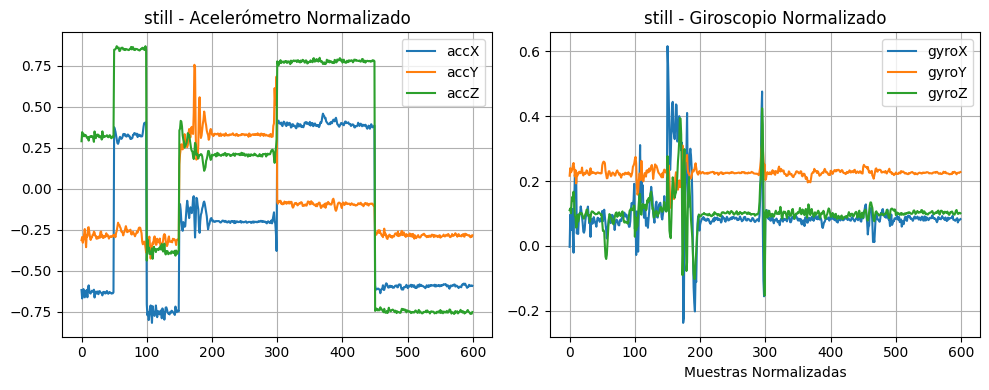

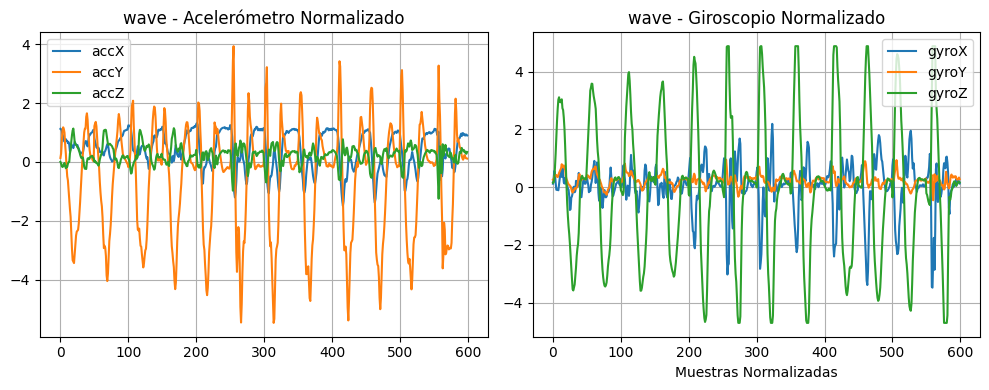

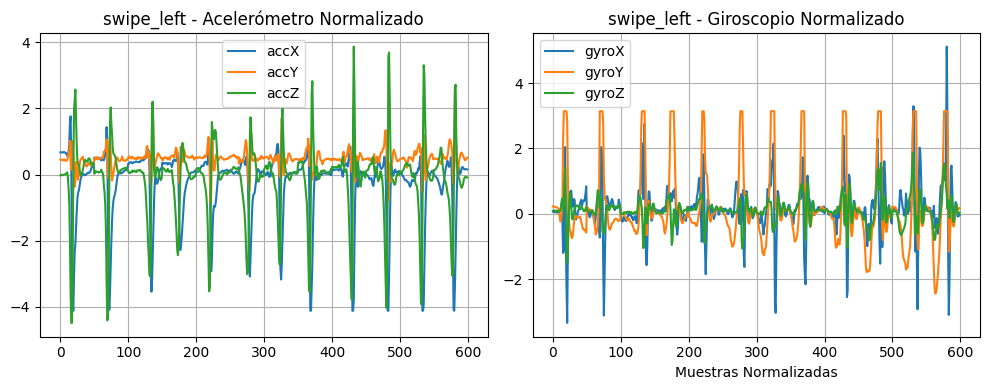

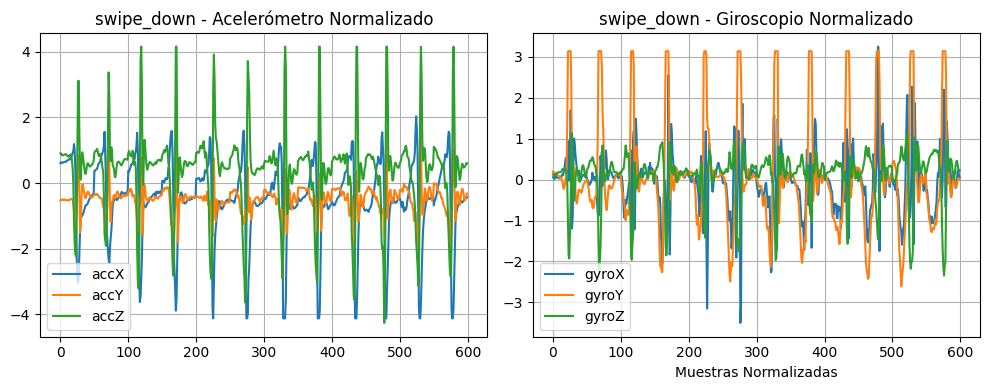

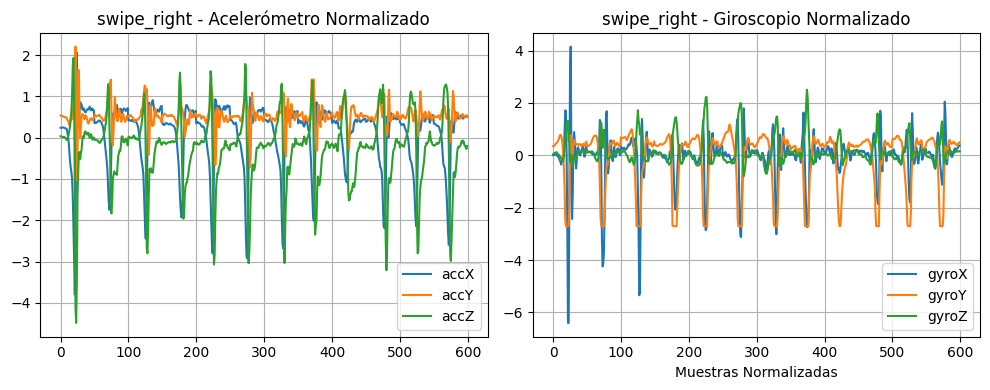

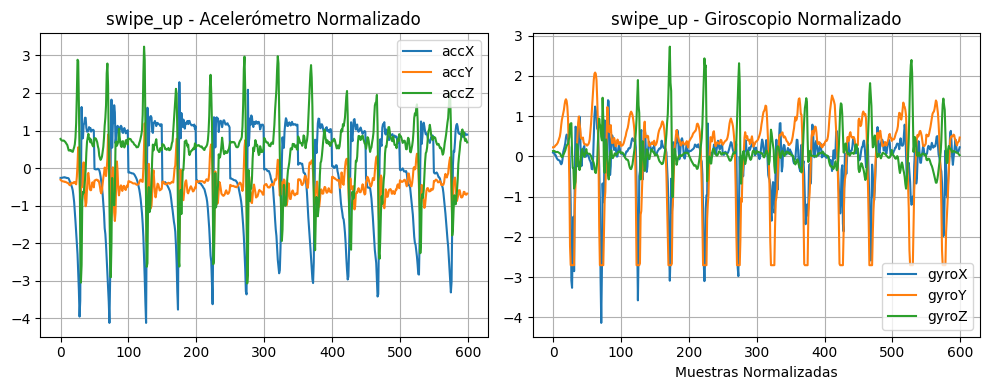

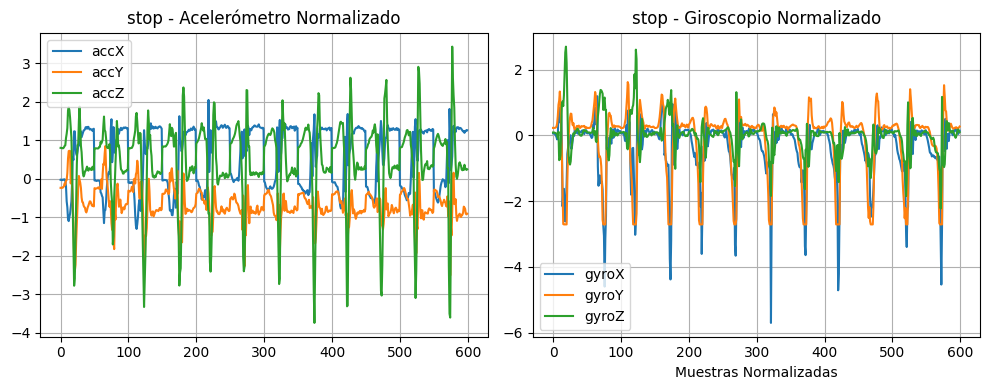

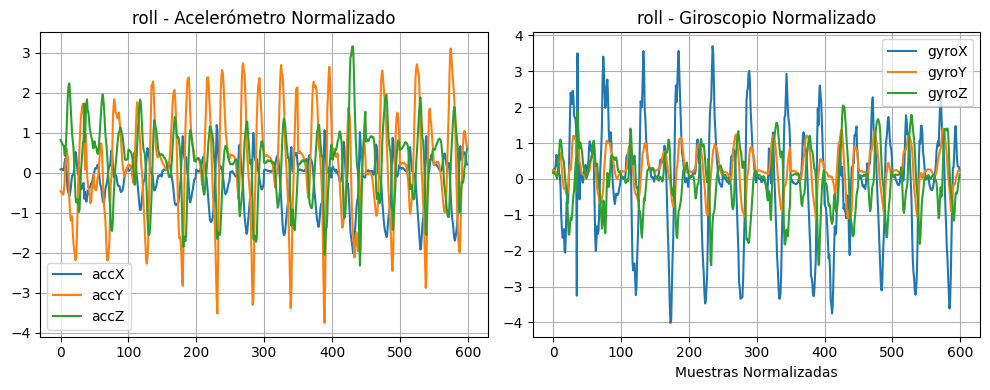

In [ ]:
# Plot of normalized data
for gesture in GESTURES:
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    df = pd.read_csv(f"{ROOT_PATH}/dataset/normalized_concat/{gesture}.csv")

    axs[0].plot(df['accX'].head(600))
    axs[0].plot(df['accY'].head(600))
    axs[0].plot(df['accZ'].head(600))
    axs[0].set_title(f'{gesture} - Acelerómetro Normalizado')
    axs[0].legend(['accX', 'accY', 'accZ'])
    axs[0].grid(True)

    axs[1].plot(df['gyroX'].head(600))
    axs[1].plot(df['gyroY'].head(600))
    axs[1].plot(df['gyroZ'].head(600))
    axs[1].set_title(f'{gesture} - Giroscopio Normalizado')
    axs[1].legend(['gyroX', 'gyroY', 'gyroZ'])
    axs[1].grid(True)


    plt.xlabel("Muestras Normalizadas")

    plt.tight_layout()

    plt.show()